# CSCI 4155 Machine Learning - Group Project

---
Group 13:
- [Corentin Goetghebeur](cr453043@dal.ca) - B00945496
- [Gabriel Marchand](gb614643@dal.ca) - B00929349
- [Rinchen Toh](rn835427@dal.ca) - B00944448
---

This notebook is part of a group project taking place during the fall semester of 2022 in the CSCI 4155 Machine Learning class in Dalhousie University (NS, Canada).

This project aims to compare different machine learning algorithms to detect network intrusions using the KDD Cup'99 dataset.

---

This notebook contains the classification using the Support Vector Machine algorithm.

# Support Vector Machine

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading datasets

The dataset has already been processed and split in the preprocessing notebook.

In [5]:
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")

In [7]:
print(f"Training dataset shape: {X_train.shape}")
print(f"Testing dataset shape: {X_test.shape}")

print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

Training dataset shape: (370515, 32)
Testing dataset shape: (123505, 32)
Training labels: (370515,)
Testing labels: (123505,)


In [6]:
y_train = y_train['label']
y_test = y_test['label']

In [8]:
print(y_train.unique())

['normal' 'dos' 'r2l' 'probe' 'u2r']


## Scaling

In [9]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [10]:
# training
from sklearn.svm import SVC 

model = SVC()
model.fit(X_train, y_train)

SVC()

In [11]:
print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")

Training score: 0.9990445730942067
Testing score: 0.9989717015505445


In [12]:
y_predicted = model.predict(X_test)

## Model Evaluation

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       0.99      0.97      0.98      1056
         r2l       0.94      0.86      0.90       279
         u2r       0.82      0.75      0.78        12

    accuracy                           1.00    123505
   macro avg       0.95      0.92      0.93    123505
weighted avg       1.00      1.00      1.00    123505



In [14]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

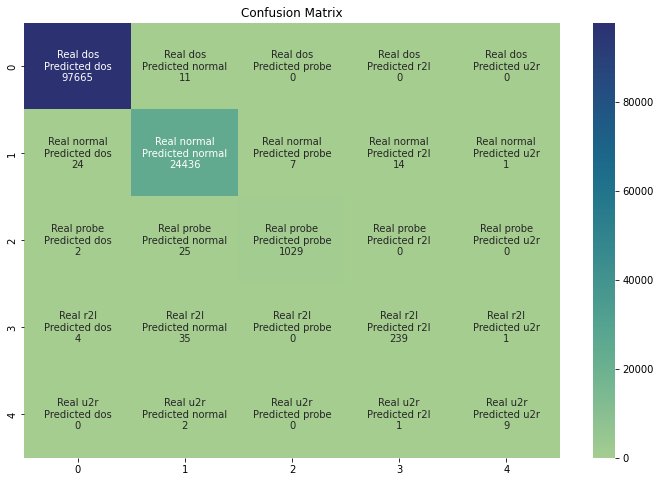

In [15]:
# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()

**Reminder on label proportions:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


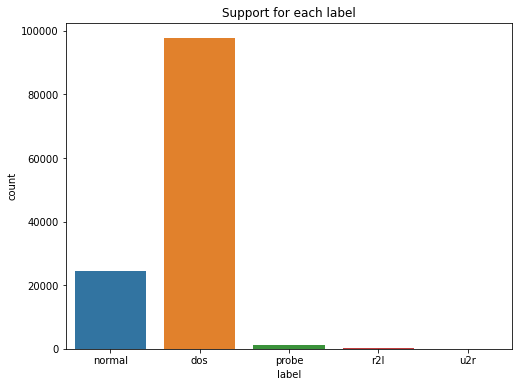


dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64

dos       97676
normal    24482
probe      1056
r2l         279
u2r          12
Name: label, dtype: int64


In [17]:
plt.figure(figsize=(8,6))
plt.title("Support for each label")
sns.countplot(y_test, )
plt.show()

print(f"\n{y_test.value_counts() / y_test.shape[0]}\n\n{y_test.value_counts()}")

## Conclusion

Excellent overall prediction results:
- 1.00 accuracy
- 1.00 precision weighted avg
- 1.00 recall weighted avg
- 1.00 f1-score weighted avg

Good results on the recall of R2L and U2R (resp. 86% and 75%).
